In [1]:
import sqlite3
import time
import datetime
import random
from matplotlib import pyplot as plt
from datetime import datetime, timezone

In [2]:
conn = sqlite3.connect('mqtt.sqlite3')
c = conn.cursor()
print(c)

In [3]:
class Parsel:
    def __init__(self, subset):
        self.temp = []
        self.hum = []
        self.soil = []
        self.lum1 = []
        self.lum2 = []
        self.ts = []

        for row in subset:
            #print(row)
            self.temp.append(row[0])
            self.hum.append(row[1])
            self.soil.append(row[2])
            self.lum1.append(row[3])
            self.lum2.append(row[4])
            self.ts.append(row[5])

In [4]:
def datetime_to_timestamp(y, m, d, h=0, min_=0, sec=0):
    my_dt = datetime(y, m, d, h, min_, sec)
    my_timestamp = my_dt.replace(tzinfo=timezone.utc).timestamp()
    return int(my_timestamp)

#x = datetime_to_timestamp(2022, 4, 28, 20, 16, 0)
#x = datetime_to_timestamp(2022, 4, 28)
#print(x)

In [5]:
def timestamp_to_datetime(ts):
    objectdate = datetime.fromtimestamp(objtmstmp)

> За день получаем `60 * 60 * 24 / 2 = 43 200` измерений.
Для нормального отображения графика нужно не более 2000 точек (исходя из разрешения экрана FullHD)
> `43 200 / 2000 = 22`
Достаточно брать каждую 22-ю точку.
Для ровности можно брать каждую 30-ю, т.е.одно измерение в минуту

In [6]:
def plot_temp_hum(parsel, step=50, n_xticks=12):

    temp_min = parsel.temp[::step]
    hum_min = parsel.hum[::step]
    ts_min = parsel.ts[::step]
    ts_min = [datetime.fromtimestamp(elem).strftime("%H:%M\n%d-%m-%y") for elem in ts_min]

    plt.figure(figsize=(14, 8))
    plt.grid(True)

    plt.plot(ts_min, temp_min, label='temp')
    plt.plot(ts_min, hum_min, label='hum')
    plt.draw()
    plt.xticks(rotation="vertical")
    plt.xlabel(r'date')
    
    N = int( len(temp_min)/n_xticks ) + 1  # 1 tick every 3
    print("Plot every ",N , "th xtick")
    
    xticks_pos, xticks_labels = plt.xticks()  # get all axis ticks
    myticks = [j for i,j in enumerate(xticks_pos) if not i%N]  # index of selected ticks
    newlabels = [label for i,label in enumerate(xticks_labels) if not i%N]
    plt.xticks(myticks, newlabels)  # set new X axis ticks and labels
    
    plt.legend()
    plt.show()

In [7]:
def plot_soil(parsel, step=50, n_xticks=12):
    soil_min = parsel.soil[::step]
    ts_min = parsel.ts[::step]
    ts_min = [datetime.fromtimestamp(elem).strftime("%H:%M\n%d-%m-%y") for elem in ts_min]
    
    plt.figure(figsize=(14, 8))
    plt.grid(True)
    #plt.plot(ts[::30], lum1[::30])
    plt.plot(ts_min, soil_min, label='Soil')
    plt.draw()
    plt.xticks(rotation="vertical")
    plt.xlabel(r'date')
    
    N = int( len(soil_min)/n_xticks ) + 1
    print("Plot every ",N , "th xtick")
    
    xticks_pos, xticks_labels = plt.xticks()  # get all axis ticks
    myticks = [j for i,j in enumerate(xticks_pos) if not i%N]  # index of selected ticks
    newlabels = [label for i,label in enumerate(xticks_labels) if not i%N]
    plt.xticks(myticks, newlabels)  # set new X axis ticks and labels
    
    #plt.scatter(ts_min, soil_min, label='Soil')
    plt.legend()
    plt.show()

In [8]:
def plot_lum(parsel, step=50, n_xticks=12):

    lum1_min = parsel.lum1[::step]
    lum2_min = parsel.lum2[::step]

    ts_min = parsel.ts[::step]
    ts_min = [datetime.fromtimestamp(elem).strftime("%H:%M %d-%m-%y") for elem in ts_min]
    #ts_min = list(map(datetime.fromtimestamp(elem).strftime("%H:%M"), ts_min ))

    plt.figure(figsize=(14, 8))
    plt.grid(True)
    #plt.plot(ts[::30], lum1[::30])
    plt.plot(ts_min, lum1_min, label='Luminance left')
    plt.plot(ts_min, lum2_min, label='Luminance right')
    plt.draw()
    plt.xticks(rotation="vertical")
    plt.xlabel(r'date')
    #plt.locator_params(axis='x', nbins=10)
    
    N = int( len(lum1_min)/n_xticks ) + 1  # 1 tick every 3
    print("Plot every ",N , "th xtick")
    
    xticks_pos, xticks_labels = plt.xticks()  # get all axis ticks
    myticks = [j for i,j in enumerate(xticks_pos) if not i%N]  # index of selected ticks
    newlabels = [label for i,label in enumerate(xticks_labels) if not i%N]
    plt.xticks(myticks, newlabels)  # set new X axis ticks and labels
    
    plt.legend()
    plt.show()

In [9]:
def statistics_for_period():
    ts1 = datetime_to_timestamp(2022, 4, 28)
    ts2 = datetime_to_timestamp(2022, 4, 29)
    
    sql = "select temp, hum, soil, lum_1, lum_2, created_at from sensors_data where created_at between " \
    + str(ts1) + " and " + str(ts2)
    c.execute(sql)
    data = c.fetchall()
    n_rows = len(data)
    print("Строк за выбранный период: ", n_rows)
    
    step = int(n_rows / 500)
    print("Шаг выборки:", step)
    
    subset = data[::step]
    print("Размер подмножества для анализа: ", len(subset))
    p2 = Parsel(subset)
    #print(subset[:5])
    
    plot_temp_hum(p2, 1, 12)
    plot_soil(p2, 1, 12)
    plot_lum(p2, 1, 12)

Строк за выбранный период:  32826
Шаг выборки: 65
Размер подмножества для анализа:  506
Plot every  43 th xtick


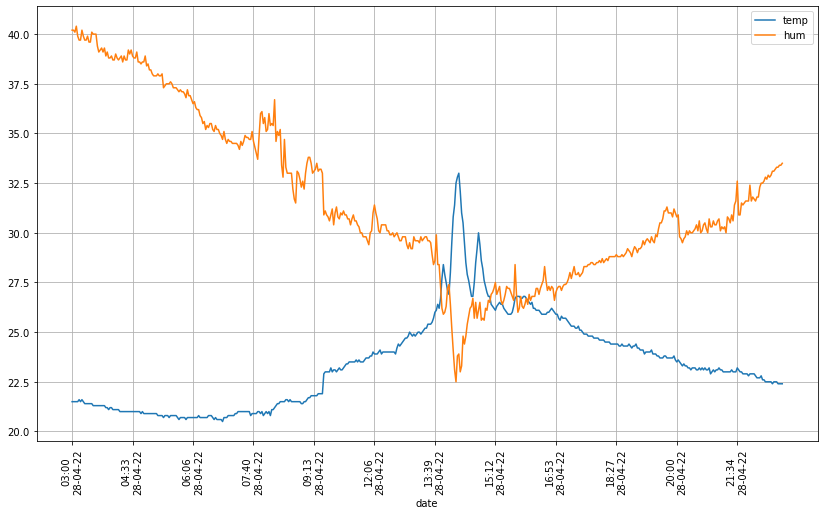

Plot every  43 th xtick


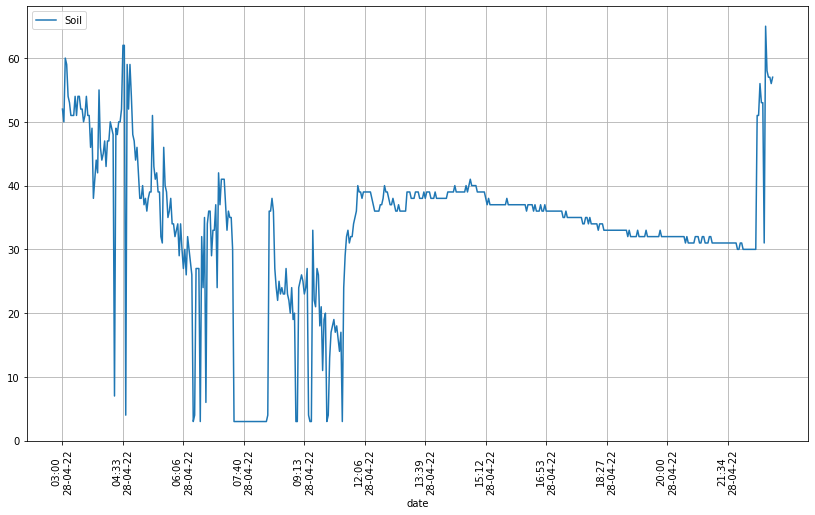

Plot every  43 th xtick


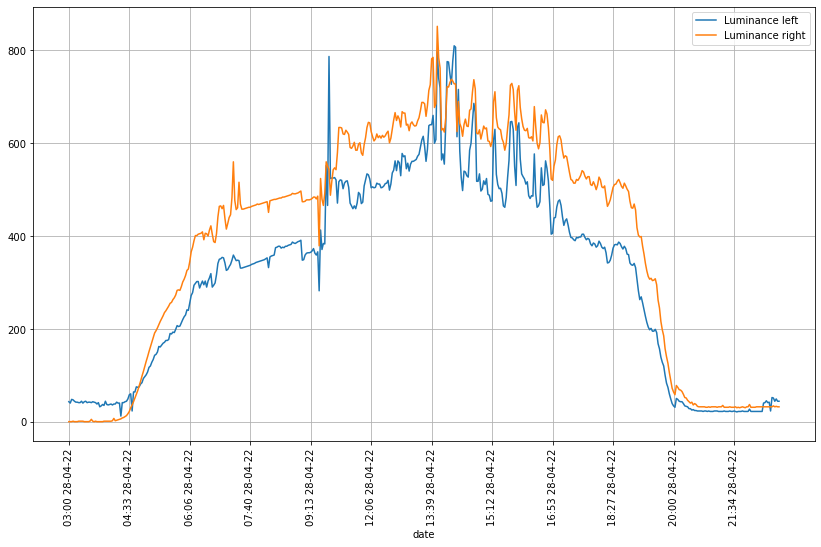

In [10]:
statistics_for_period()

In [11]:
def read_all_from_db():
    #c.execute('SELECT * FROM sensors_data')
    c.execute('SELECT temp, hum, soil, lum_1, lum_2, created_at FROM sensors_data')
    data = c.fetchall()
    
    p = Parsel(data)
    return p

#all_parsels = read_all_from_db()
#print("Всего строк к базе данных: ", len(all_parsels.temp))
#dt = datetime.fromtimestamp(all_parsels.ts[0])
#print(dt)
#print(dt.strftime("%H:%M"))

In [12]:
#plot_lum(all_parsels, 120, 12)

In [13]:
#plot_temp_hum(all_parsels, 120, 12)

In [14]:
#plot_soil(all_parsels, 120, 12)